# **Loan Approval Modal Training**

---



# All imports


In [40]:
# importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Analysing the data frame

In [4]:
# checking if the dataset is their in the google colab or not
!pwd
!ls -lh

/content
total 76K
-rw-r--r-- 1 root root  67K Aug 19 14:05 data.csv
drwx------ 5 root root 4.0K Aug 19 14:04 drive
drwxr-xr-x 1 root root 4.0K Aug 15 13:35 sample_data


In [3]:
# uploading dataset in the google colab

from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001174,Male,Yes,0,Graduate,No,3772,833.0,57.0,360.0,,Semiurban,\r\nLP002087,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y\r\nLP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y\r\nLP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,,Urban,Y\r\nLP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N\r\nLP002489,Female,No,1,Not Graduate,,5191,0.0,132.0,360.0,1.0,Semiurban,Y\r\nLP002561,Male,Yes,0,Graduate,No,5000,0.0,126.0,360.0,1.0,Rural,\r\nLP002712,Male,No,2,Not Graduate,No,2733,1083.0,180.0,360.0,,Semiurban,\r\nLP001797,Female,No,0,Graduate,No,12941,0.0,150.0,300.0,1.0,Urban,\r\nLP001737,Male,No,0,Graduate,No,4000,0.0,83.0,84.0,1.0,Urban,\r\nLP001446,Male,Yes,0,Graduate,No,8449,0.0,257.0,360.0,1.0,Rural,\r\nLP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Se

In [5]:
# importing dataset in the google colab as df

df = pd.read_csv("data.csv")

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001174,Male,Yes,0,Graduate,No,3772,833.0,57.0,360.0,NaN,Semiurban,NaN
1,LP002087,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y
2,LP002692,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
3,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
4,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N


# Making Data ready for Training

In [7]:
# getting data whose Loan status, LoanAmount, Loan_Amount_Term is not not null and apply other operations on that only that rows.
df_train = df.dropna(subset=['Loan_Status','LoanAmount','Loan_Amount_Term']).copy()

#remove all the dublicates rows
df_train.drop_duplicates(inplace = True)

# remove loan id column
df_train.drop('Loan_ID', axis=1, inplace=True)


df_hold = df[df['Loan_Status'].isna()].copy()

In [8]:

# Convert '3+' to 3 in Dependents
df_train['Dependents'] = df_train['Dependents'].replace('3+', '3')
df_train.fillna({"Dependents": 0}, inplace=True)
df_train['Dependents'] = df_train['Dependents'].astype(int)

# Convert Loan_Status 'Y'/'N' to 1/0
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})
df_train.fillna({"Loan_Status": -1}, inplace=True)
df_train['Loan_Status'] = df_train['Loan_Status'].astype(int)

# convert gender if male-1 & female-0
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train.fillna({"Gender": 0}, inplace=True)
df_train['Gender'] = df_train['Gender'].astype(int)

# convert Self_Employed if yes-1 & no-0
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1, 'No': 0})
df_train.fillna({"Self_Employed": 0}, inplace=True)
df_train['Self_Employed'] = df_train['Self_Employed'].astype(int)

# convert Property_Area if 'Rural': 0, 'Semiurban': 1, 'Urban': 2
df_train['Property_Area'] = df_train['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df_train.fillna({"Property_Area": 1}, inplace=True)
df_train['Property_Area'] = df_train['Property_Area'].astype(int)

# convert Education if Graduate-1 & Not Graduate-0
df_train['Education'] = df_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df_train.fillna({"Education": 0}, inplace=True)
df_train['Education'] = df_train['Education'].astype(int)

# convert Married if yes-1 & no-0
df_train['Married'] = df_train['Married'].map({'Yes': 1, 'No': 0})
df_train.fillna({"Married": 0}, inplace=True)
df_train['Married'] = df_train['Married'].astype(int)

# If Credit_History is null keep in int 0/1
df_train.fillna({"Credit_History": 0}, inplace=True)
df_train['Credit_History'] = df_train['Credit_History'].astype(int)

# changing data type to int to save the space
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(0).astype(int)
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(0).astype(int)
df_train['CoapplicantIncome'] = df_train['CoapplicantIncome'].fillna(0).astype(int)

In [37]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,0,1,0,2500,0,67,360,1,2,1
2,1,1,3,1,1,5677,1424,100,360,1,0,1
3,1,0,0,1,1,20166,0,650,480,0,2,1
4,1,0,0,1,0,1853,2840,114,360,1,0,0
5,0,0,1,0,0,5191,0,132,360,1,1,1


# Performing EDA

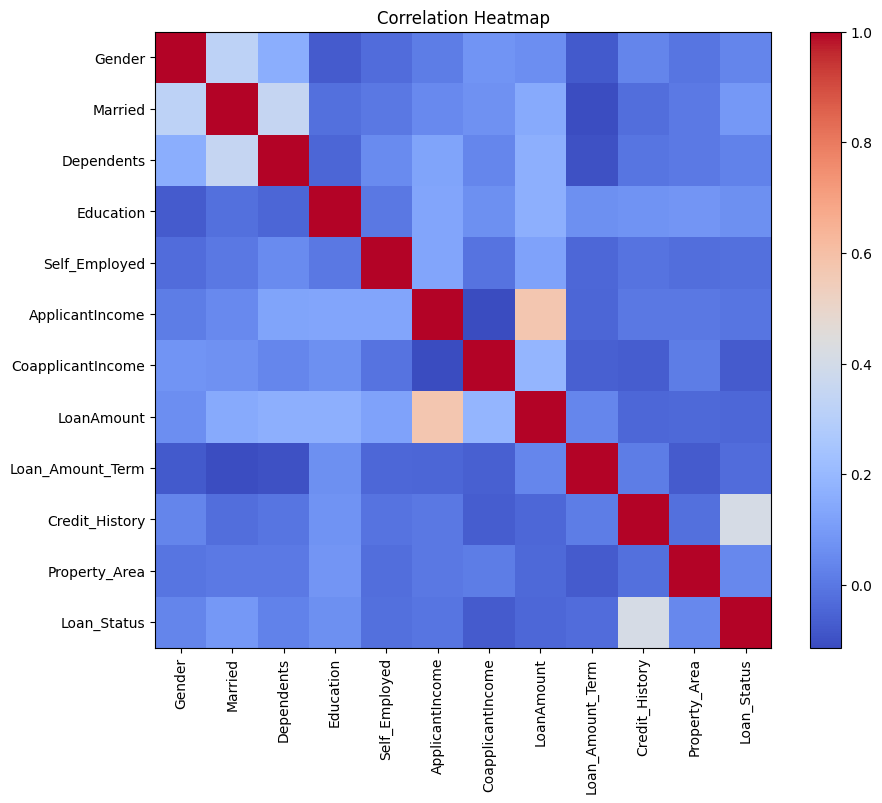

In [9]:
plt.figure(figsize=(10,8))
corr = df_train.corr()
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

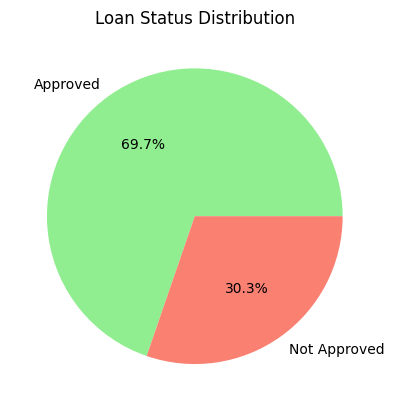

In [10]:
plt.pie(df_train['Loan_Status'].value_counts(), labels=['Approved','Not Approved'], autopct='%1.1f%%', colors=['lightgreen','salmon'])
plt.title("Loan Status Distribution")
plt.show()

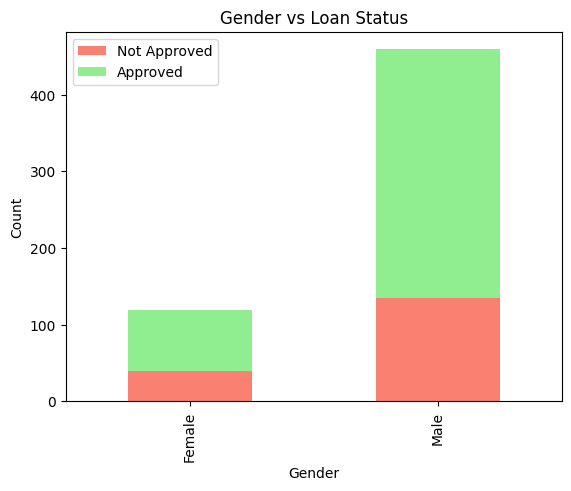

In [11]:
pd.crosstab(df_train['Gender'].map({0: "Female", 1: "Male"}), df_train['Loan_Status']).plot(
    kind="bar", stacked=True, color=['salmon','lightgreen'])
plt.title("Gender vs Loan Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Approved","Approved"])
plt.show()



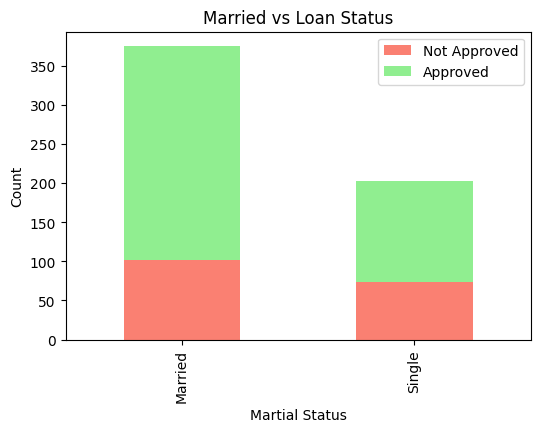

In [19]:
pd.crosstab(df_train['Married'].map({0: "Single", 1: "Married"}), df_train['Loan_Status']).plot(
    kind="bar", figsize=(6,4), stacked=True, color=['salmon','lightgreen'])
plt.title("Married vs Loan Status")
plt.xlabel("Martial Status")
plt.ylabel("Count")
plt.legend(["Not Approved","Approved"])
plt.show()


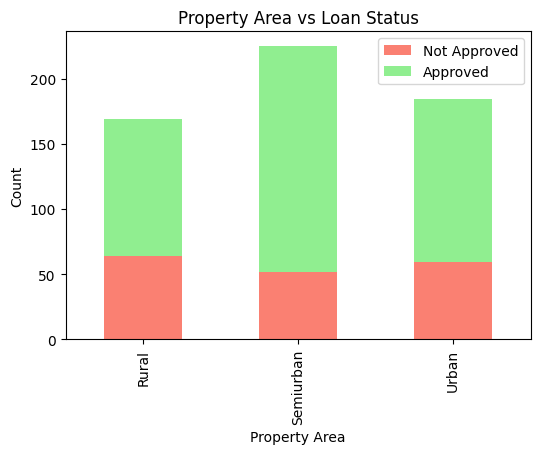

In [21]:
pd.crosstab(df_train['Property_Area'].map({0: "Rural", 1: "Semiurban", 2: "Urban"}), df_train['Loan_Status']).plot(
    kind="bar", figsize=(6,4), stacked=True, color=['salmon','lightgreen'])
plt.title("Property Area vs Loan Status")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(["Not Approved","Approved"])
plt.show()


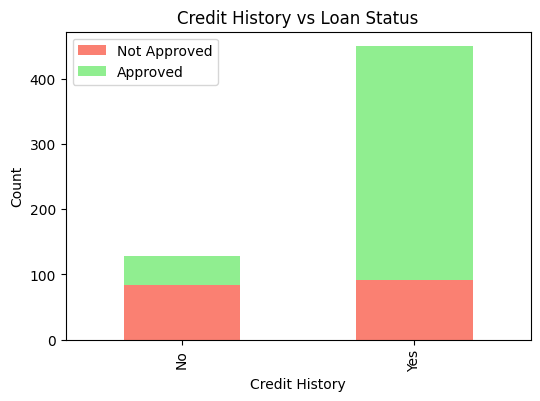

In [22]:
pd.crosstab(df_train['Credit_History'].map({0: "No", 1: "Yes"}), df_train['Loan_Status']).plot(
    kind="bar", figsize=(6,4), stacked=True, color=['salmon','lightgreen'])
plt.title("Credit History vs Loan Status")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(["Not Approved","Approved"])
plt.show()


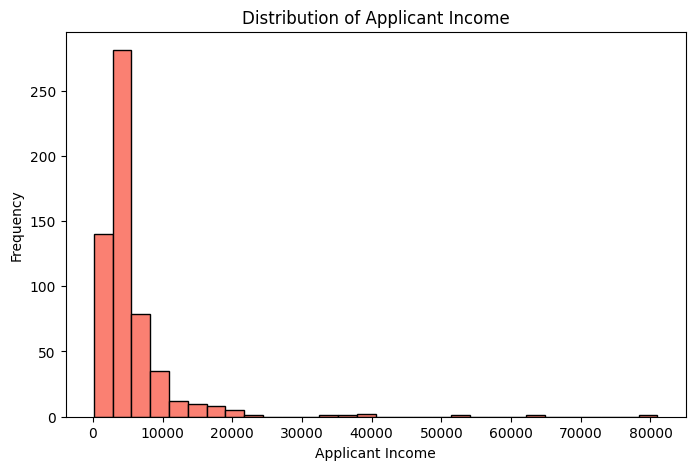

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df_train['ApplicantIncome'], bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()


# Model Training

In [30]:
# Features (all except Loan_Status)
X = df_train.drop("Loan_Status", axis=1)

# Target (Loan_Status)
y = df_train["Loan_Status"]

In [31]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )

In [32]:
# Feature Scaling (for numeric columns)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Training a Model with Logistic Regression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7327586206896551

Confusion Matrix:
 [[13 22]
 [ 9 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.37      0.46        35
           1       0.77      0.89      0.82        81

    accuracy                           0.73       116
   macro avg       0.68      0.63      0.64       116
weighted avg       0.71      0.73      0.71       116



In [38]:
# Training a Model with Decision Tree

dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7155172413793104

Confusion Matrix:
 [[15 20]
 [13 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.43      0.48        35
           1       0.77      0.84      0.80        81

    accuracy                           0.72       116
   macro avg       0.65      0.63      0.64       116
weighted avg       0.70      0.72      0.71       116



In [43]:
# Comparing Accuracies

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.7327586206896551
Decision Tree Accuracy: 0.7155172413793104


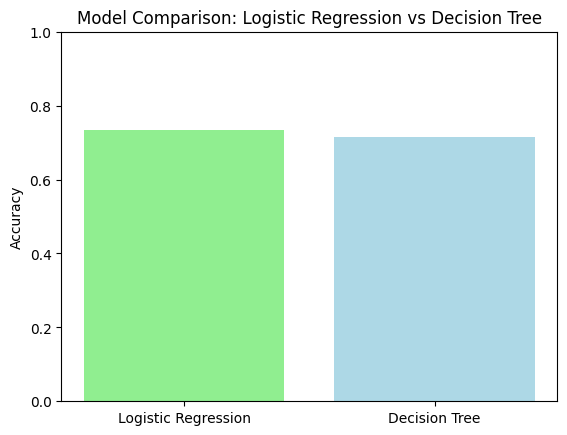

In [47]:
models = ["Logistic Regression", "Decision Tree"]
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_dt)
]

plt.bar(models, accuracies, color=['lightgreen','lightblue'])
plt.ylabel("Accuracy")
plt.title("Model Comparison: Logistic Regression vs Decision Tree")
plt.ylim(0,1)
plt.show()
